In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

from pathlib import Path

In [2]:
# load hdf file
file = Path("..", "02_pretraining", "10022024_Biotite_ds62.hdf5")
with h5py.File(file, "r") as hdf_file:
    PT_ds62 = np.array(hdf_file["PT"])
    full_biotite_composition_ds62 = np.array(hdf_file["mineral_composition"])
    element_idx = hdf_file["mineral_composition"].attrs["element idx [apfu]"]

print(*enumerate(element_idx))

bt_comp_arr_ds62 = full_biotite_composition_ds62[:, [6, 4, 5, 3, 1, 2]]

(0, 'O') (1, 'SI') (2, 'TI') (3, 'AL') (4, 'FE') (5, 'MG') (6, 'MN') (7, 'CA') (8, 'NA') (9, 'K') (10, 'H')


In [3]:
T_grid = np.linspace(400, 900, 20)
P_grid = np.linspace(0.15, 1.0, 20)

TT_grid, PP_grid = np.meshgrid(T_grid, P_grid)

i_grid_cells = np.searchsorted(P_grid, PT_ds62[:, 0] * 1e-4)
j_grid_cells = np.searchsorted(T_grid, PT_ds62[:, 1])

grid_no_samples_ds62 = np.zeros((len(P_grid), len(T_grid)))
grid_mean_comp_ds62 = np.zeros((len(P_grid), len(T_grid), 6))
grid_sd_comp_ds62 = np.zeros((len(P_grid), len(T_grid), 6))


for i in range(len(P_grid)):
    for j in range(len(T_grid)):
        idx_grid_cell = np.where(np.logical_and(i_grid_cells == i, j_grid_cells == j))[0]
        no_samples_per_cell = len(idx_grid_cell)

        if no_samples_per_cell > 2:
            mean_c = np.mean(bt_comp_arr_ds62[idx_grid_cell], axis=0)
            sd_c = np.std(bt_comp_arr_ds62[idx_grid_cell], axis=0)
        else:
            mean_c = np.nan
            sd_c = np.nan

        grid_no_samples_ds62[i, j] = no_samples_per_cell

        grid_mean_comp_ds62[i, j] = mean_c
        grid_sd_comp_ds62[i, j] = sd_c

# calculate the relative standard deviation
grid_rel_sd_comp_ds62 = grid_sd_comp_ds62 / grid_mean_comp_ds62

In [4]:
# load hdf file
file = Path("..", "02_pretraining", "15022024_Biotite_ds55Bt07.hdf5")
with h5py.File(file, "r") as hdf_file:
    PT_ds55_Bt07 = np.array(hdf_file["PT"])
    full_biotite_composition_ds55_Bt07 = np.array(hdf_file["mineral_composition"])
    element_idx = hdf_file["mineral_composition"].attrs["element idx [apfu]"]

print(*enumerate(element_idx))

bt_comp_arr_ds55_Bt07 = full_biotite_composition_ds55_Bt07[:, [7, 4, 8, 1, 10, 11]]
bt_comp_arr_ds55_Bt07[:, 2] += full_biotite_composition_ds55_Bt07[:, 3]

(0, 'O') (1, 'AL') (2, 'CA') (3, 'F3') (4, 'FE') (5, 'H') (6, 'K') (7, 'MN') (8, 'MG') (9, 'NA') (10, 'SI') (11, 'TI')


In [5]:
T_grid = np.linspace(400, 900, 20)
P_grid = np.linspace(0.15, 1.0, 20)

TT_grid, PP_grid = np.meshgrid(T_grid, P_grid)

i_grid_cells = np.searchsorted(P_grid, PT_ds55_Bt07[:, 0] * 1e-4)
j_grid_cells = np.searchsorted(T_grid, PT_ds55_Bt07[:, 1])

grid_no_samples_ds55_Bt07 = np.zeros((len(P_grid), len(T_grid)))
grid_mean_comp_ds55_Bt07 = np.zeros((len(P_grid), len(T_grid), 6))
grid_sd_comp_ds55_Bt07 = np.zeros((len(P_grid), len(T_grid), 6))


for i in range(len(P_grid)):
    for j in range(len(T_grid)):
        idx_grid_cell = np.where(np.logical_and(i_grid_cells == i, j_grid_cells == j))[0]
        no_samples_per_cell = len(idx_grid_cell)

        if no_samples_per_cell > 2:
            mean_c = np.mean(bt_comp_arr_ds55_Bt07[idx_grid_cell], axis=0)
            sd_c = np.std(bt_comp_arr_ds55_Bt07[idx_grid_cell], axis=0)
        else:
            mean_c = np.nan
            sd_c = np.nan

        grid_no_samples_ds55_Bt07[i, j] = no_samples_per_cell

        grid_mean_comp_ds55_Bt07[i, j] = mean_c
        grid_sd_comp_ds55_Bt07[i, j] = sd_c

# calculate the relative standard deviation
grid_rel_sd_comp_ds55_Bt07 = grid_sd_comp_ds55_Bt07 / grid_mean_comp_ds55_Bt07

In [6]:
# load hdf file
file = Path("..", "02_pretraining", "10042024_Biotite_ds55BtT.hdf5")
with h5py.File(file, "r") as hdf_file:
    PT_ds55_BtT = np.array(hdf_file["PT"])
    full_biotite_composition_ds55_BtT = np.array(hdf_file["mineral_composition"])
    element_idx = hdf_file["mineral_composition"].attrs["element idx [apfu]"]

print(*enumerate(element_idx))
bt_comp_arr_ds55_BtT = full_biotite_composition_ds55_BtT[:, [7, 4, 8, 1, 10, 11]]
bt_comp_arr_ds55_BtT[:, 2] += full_biotite_composition_ds55_BtT[:, 3]

(0, 'O') (1, 'AL') (2, 'CA') (3, 'F3') (4, 'FE') (5, 'H') (6, 'K') (7, 'MN') (8, 'MG') (9, 'NA') (10, 'SI') (11, 'TI')


In [7]:
T_grid = np.linspace(400, 900, 20)
P_grid = np.linspace(0.15, 1.0, 20)

TT_grid, PP_grid = np.meshgrid(T_grid, P_grid)

i_grid_cells = np.searchsorted(P_grid, PT_ds55_BtT[:, 0] * 1e-4)
j_grid_cells = np.searchsorted(T_grid, PT_ds55_BtT[:, 1])

grid_no_samples_ds55_BtT = np.zeros((len(P_grid), len(T_grid)))
grid_mean_comp_ds55_BtT = np.zeros((len(P_grid), len(T_grid), 6))
grid_sd_comp_ds55_BtT = np.zeros((len(P_grid), len(T_grid), 6))


for i in range(len(P_grid)):
    for j in range(len(T_grid)):
        idx_grid_cell = np.where(np.logical_and(i_grid_cells == i, j_grid_cells == j))[0]
        no_samples_per_cell = len(idx_grid_cell)

        if no_samples_per_cell > 2:
            mean_c = np.mean(bt_comp_arr_ds55_BtT[idx_grid_cell], axis=0)
            sd_c = np.std(bt_comp_arr_ds55_BtT[idx_grid_cell], axis=0)
        else:
            mean_c = np.nan
            sd_c = np.nan

        grid_no_samples_ds55_BtT[i, j] = no_samples_per_cell

        grid_mean_comp_ds55_BtT[i, j] = mean_c
        grid_sd_comp_ds55_BtT[i, j] = sd_c

# calculate the relative standard deviation
grid_rel_sd_comp_ds55_BtT = grid_sd_comp_ds55_BtT / grid_mean_comp_ds55_BtT

In [8]:
element_min = np.min(np.array([np.nanmin(grid_mean_comp_ds62, axis=(0, 1)), np.nanmin(grid_mean_comp_ds55_Bt07, axis=(0, 1)), np.nanmin(grid_mean_comp_ds55_BtT, axis=(0, 1))]), axis=0)
element_max = np.max(np.array([np.nanmax(grid_mean_comp_ds62, axis=(0, 1)), np.nanmax(grid_mean_comp_ds55_Bt07, axis=(0, 1)), np.nanmax(grid_mean_comp_ds55_BtT, axis=(0, 1))]), axis=0)

rel_sd_min = np.min(np.array([np.nanmin(grid_rel_sd_comp_ds62, axis=(0, 1)), np.nanmin(grid_rel_sd_comp_ds55_Bt07, axis=(0, 1)), np.nanmin(grid_rel_sd_comp_ds55_BtT, axis=(0, 1))]), axis=0)
rel_sd_max = np.max(np.array([np.nanmax(grid_rel_sd_comp_ds62, axis=(0, 1)), np.nanmax(grid_rel_sd_comp_ds55_Bt07, axis=(0, 1)), np.nanmax(grid_rel_sd_comp_ds55_BtT, axis=(0, 1))]), axis=0)

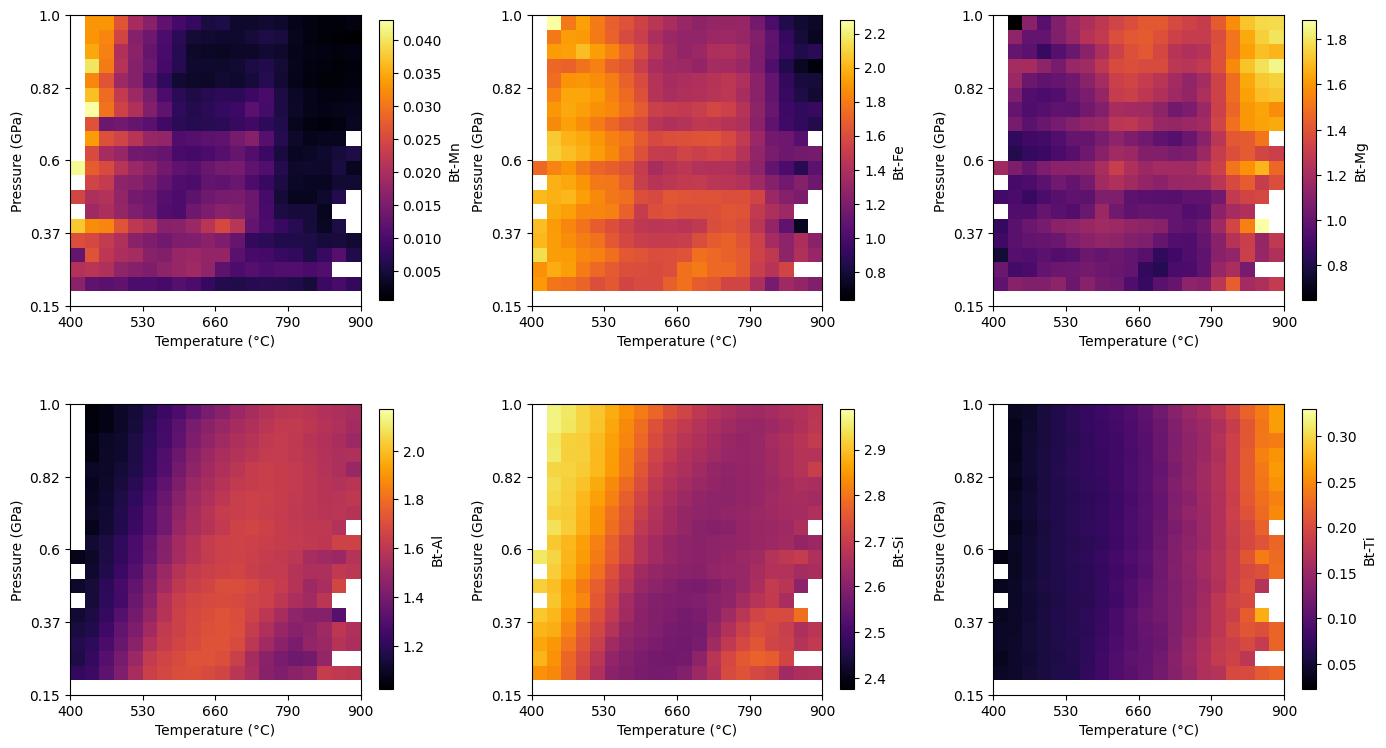

In [9]:
cmap_magma = plt.get_cmap("inferno")
cmap_magma.set_bad("white")

NO_TICKS = 5

fig, axs = plt.subplots(2, 3, figsize=(14, 8))

for title, element_idx, ax in zip(["Mn", "Fe", "Mg", "Al", "Si", "Ti"], range(6), axs.flat):
    img = ax.imshow(grid_mean_comp_ds62[:,:, element_idx], origin="lower", cmap=cmap_magma, extent=[0, 20, 0, 20], vmin=element_min[element_idx], vmax=element_max[element_idx])
    # ax.set_title(title)

    ax.set_xticks(np.arange(0, len(T_grid)+1, NO_TICKS))
    ax.set_xticklabels(np.int32(np.append(np.round(T_grid[0::NO_TICKS], decimals=-1), np.round(T_grid[-1], decimals=-1))))
    ax.set_xlabel("Temperature (°C)")
    ax.set_yticks(np.arange(0, len(P_grid)+1, NO_TICKS))
    ax.set_yticklabels(np.append(np.round(P_grid[0::NO_TICKS], decimals=2), np.round(P_grid[-1], decimals=2)))
    ax.set_ylabel("Pressure (GPa)")

    fig.colorbar(img, ax=ax, label=f"Bt-{title}", shrink=0.8)

fig.tight_layout()
# fig.savefig(Path("exported_figs", "SimBtComp_PT_ds62.pdf"), dpi=600)

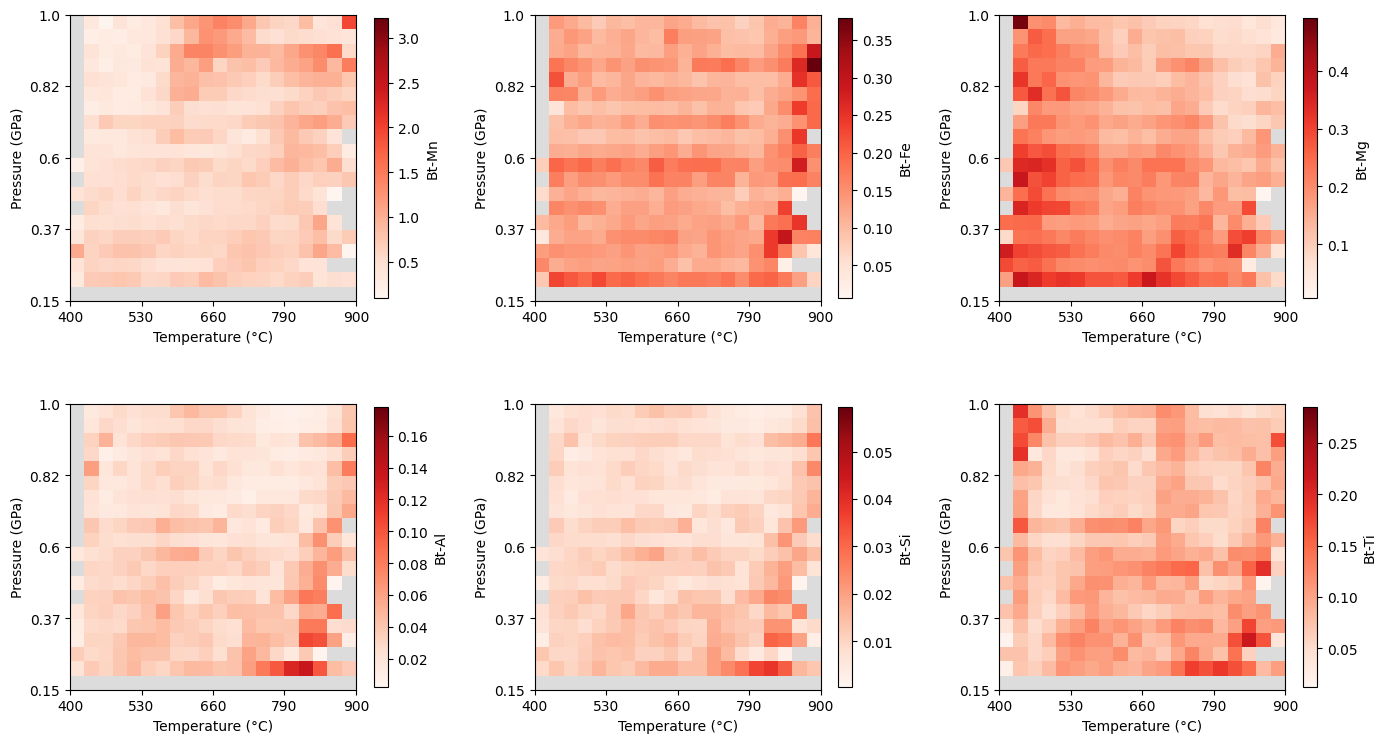

In [10]:
cmap_magma = plt.get_cmap("Reds")
cmap_magma.set_bad("gainsboro")

NO_TICKS = 5

fig, axs = plt.subplots(2, 3, figsize=(14, 8))

for title, element_idx, ax in zip(["Mn", "Fe", "Mg", "Al", "Si", "Ti"], range(6), axs.flat):
    img = ax.imshow(grid_rel_sd_comp_ds62[:,:, element_idx], origin="lower", cmap=cmap_magma, extent=[0, 20, 0, 20], vmin=rel_sd_min[element_idx], vmax=rel_sd_max[element_idx])
    # ax.set_title(title)

    ax.set_xticks(np.arange(0, len(T_grid)+1, NO_TICKS))
    ax.set_xticklabels(np.int32(np.append(np.round(T_grid[0::NO_TICKS], decimals=-1), np.round(T_grid[-1], decimals=-1))))
    ax.set_xlabel("Temperature (°C)")
    ax.set_yticks(np.arange(0, len(P_grid)+1, NO_TICKS))
    ax.set_yticklabels(np.append(np.round(P_grid[0::NO_TICKS], decimals=2), np.round(P_grid[-1], decimals=2)))
    ax.set_ylabel("Pressure (GPa)")

    fig.colorbar(img, ax=ax, label=f"Bt-{title}", shrink=0.8)

fig.tight_layout()
# fig.savefig(Path("exported_figs", "SimBtComp_PT_SD_ds62.pdf"), dpi=600)

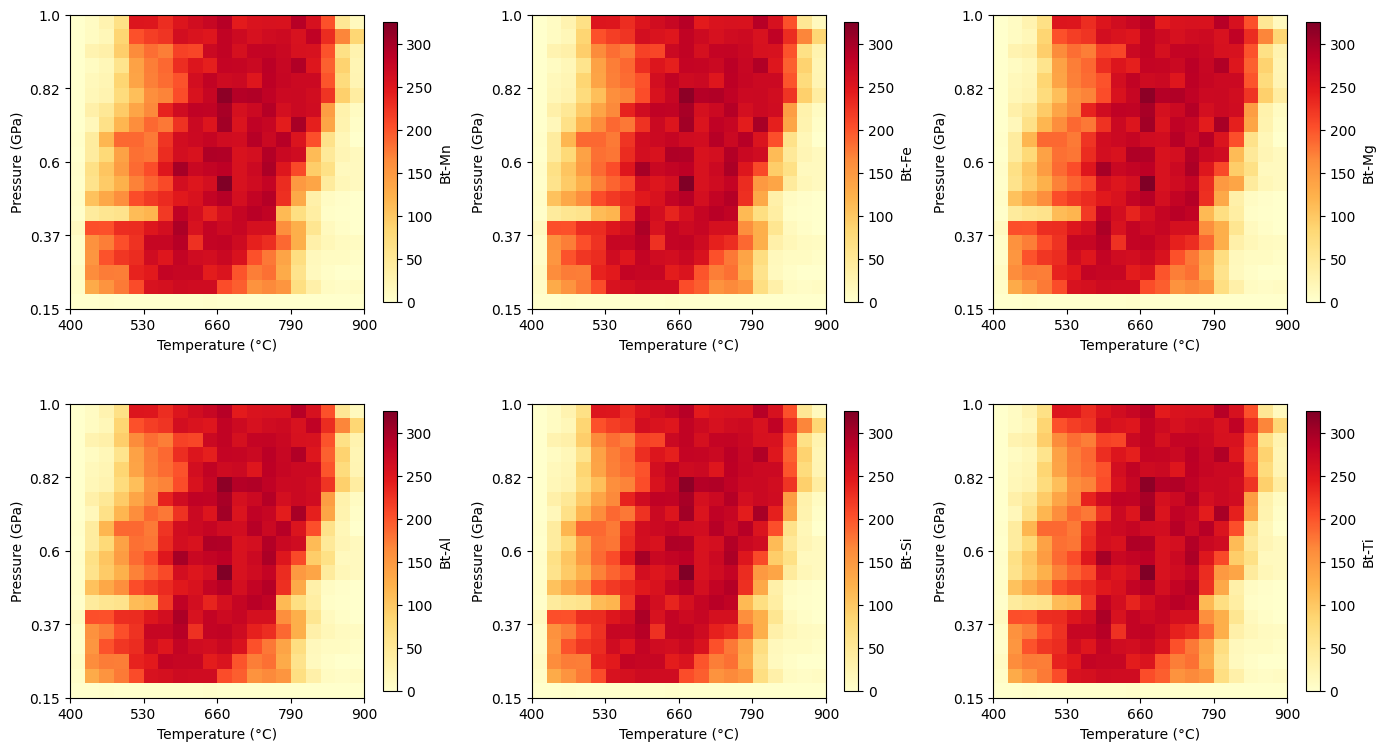

In [11]:
cmap_magma = plt.get_cmap("YlOrRd")
cmap_magma.set_bad("gainsboro")

NO_TICKS = 5

fig, axs = plt.subplots(2, 3, figsize=(14, 8))

for title, element_idx, ax in zip(["Mn", "Fe", "Mg", "Al", "Si", "Ti"], range(6), axs.flat):
    img = ax.imshow(grid_no_samples_ds62, origin="lower", cmap=cmap_magma, extent=[0, 20, 0, 20])
    # ax.set_title(title)

    ax.set_xticks(np.arange(0, len(T_grid)+1, NO_TICKS))
    ax.set_xticklabels(np.int32(np.append(np.round(T_grid[0::NO_TICKS], decimals=-1), np.round(T_grid[-1], decimals=-1))))
    ax.set_xlabel("Temperature (°C)")
    ax.set_yticks(np.arange(0, len(P_grid)+1, NO_TICKS))
    ax.set_yticklabels(np.append(np.round(P_grid[0::NO_TICKS], decimals=2), np.round(P_grid[-1], decimals=2)))
    ax.set_ylabel("Pressure (GPa)")

    fig.colorbar(img, ax=ax, label=f"Bt-{title}", shrink=0.8)

fig.tight_layout()
# fig.savefig(Path("exported_figs", "SimBtComp_PT_noSamples_ds62.pdf"), dpi=600)

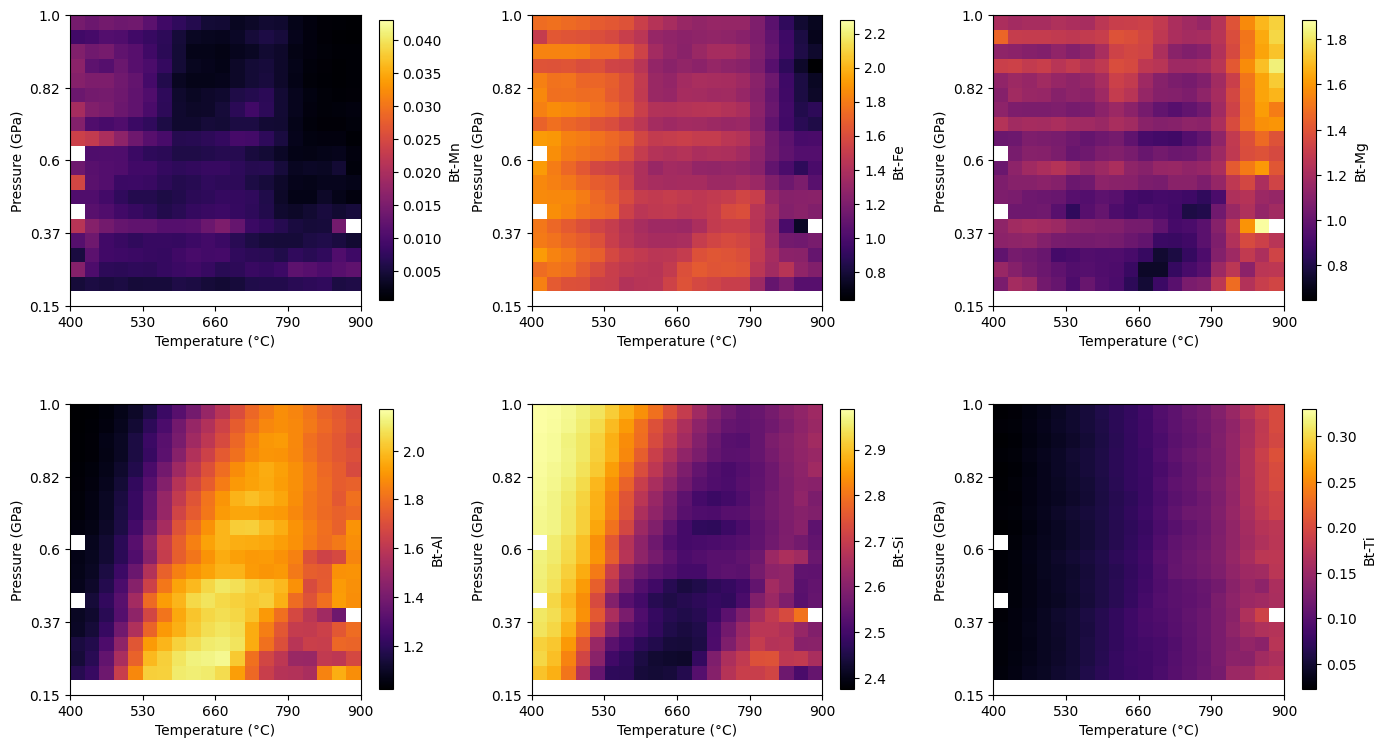

In [12]:
cmap_magma = plt.get_cmap("inferno")
cmap_magma.set_bad("white")

NO_TICKS = 5

fig, axs = plt.subplots(2, 3, figsize=(14, 8))

for title, element_idx, ax in zip(["Mn", "Fe", "Mg", "Al", "Si", "Ti"], range(6), axs.flat):
    img = ax.imshow(grid_mean_comp_ds55_Bt07[:,:, element_idx], origin="lower", cmap=cmap_magma, extent=[0, 20, 0, 20], vmin=element_min[element_idx], vmax=element_max[element_idx])
    # ax.set_title(title)

    ax.set_xticks(np.arange(0, len(T_grid)+1, NO_TICKS))
    ax.set_xticklabels(np.int32(np.append(np.round(T_grid[0::NO_TICKS], decimals=-1), np.round(T_grid[-1], decimals=-1))))
    ax.set_xlabel("Temperature (°C)")
    ax.set_yticks(np.arange(0, len(P_grid)+1, NO_TICKS))
    ax.set_yticklabels(np.append(np.round(P_grid[0::NO_TICKS], decimals=2), np.round(P_grid[-1], decimals=2)))
    ax.set_ylabel("Pressure (GPa)")

    fig.colorbar(img, ax=ax, label=f"Bt-{title}", shrink=0.8)

fig.tight_layout()
# fig.savefig(Path("exported_figs", "SimBtComp_PT_ds55Bt07.pdf"), dpi=600)

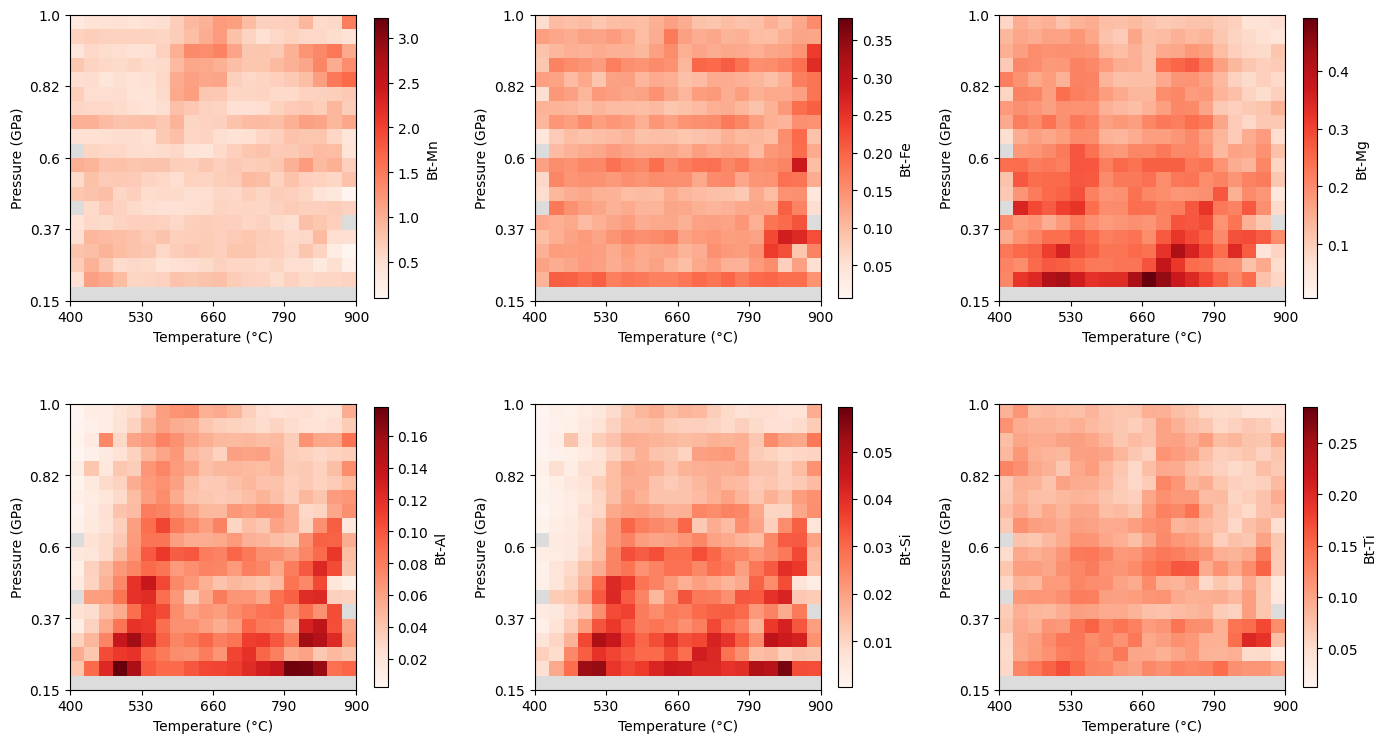

In [13]:
cmap_magma = plt.get_cmap("Reds")
cmap_magma.set_bad("gainsboro")

NO_TICKS = 5

fig, axs = plt.subplots(2, 3, figsize=(14, 8))

for title, element_idx, ax in zip(["Mn", "Fe", "Mg", "Al", "Si", "Ti"], range(6), axs.flat):
    img = ax.imshow(grid_rel_sd_comp_ds55_Bt07[:,:, element_idx], origin="lower", cmap=cmap_magma, extent=[0, 20, 0, 20], vmin=rel_sd_min[element_idx], vmax=rel_sd_max[element_idx])
    # ax.set_title(title)

    ax.set_xticks(np.arange(0, len(T_grid)+1, NO_TICKS))
    ax.set_xticklabels(np.int32(np.append(np.round(T_grid[0::NO_TICKS], decimals=-1), np.round(T_grid[-1], decimals=-1))))
    ax.set_xlabel("Temperature (°C)")
    ax.set_yticks(np.arange(0, len(P_grid)+1, NO_TICKS))
    ax.set_yticklabels(np.append(np.round(P_grid[0::NO_TICKS], decimals=2), np.round(P_grid[-1], decimals=2)))
    ax.set_ylabel("Pressure (GPa)")

    fig.colorbar(img, ax=ax, label=f"Bt-{title}", shrink=0.8)

fig.tight_layout()
# fig.savefig(Path("exported_figs", "SimBtComp_PT_SD_ds55Bt07.pdf"), dpi=600)

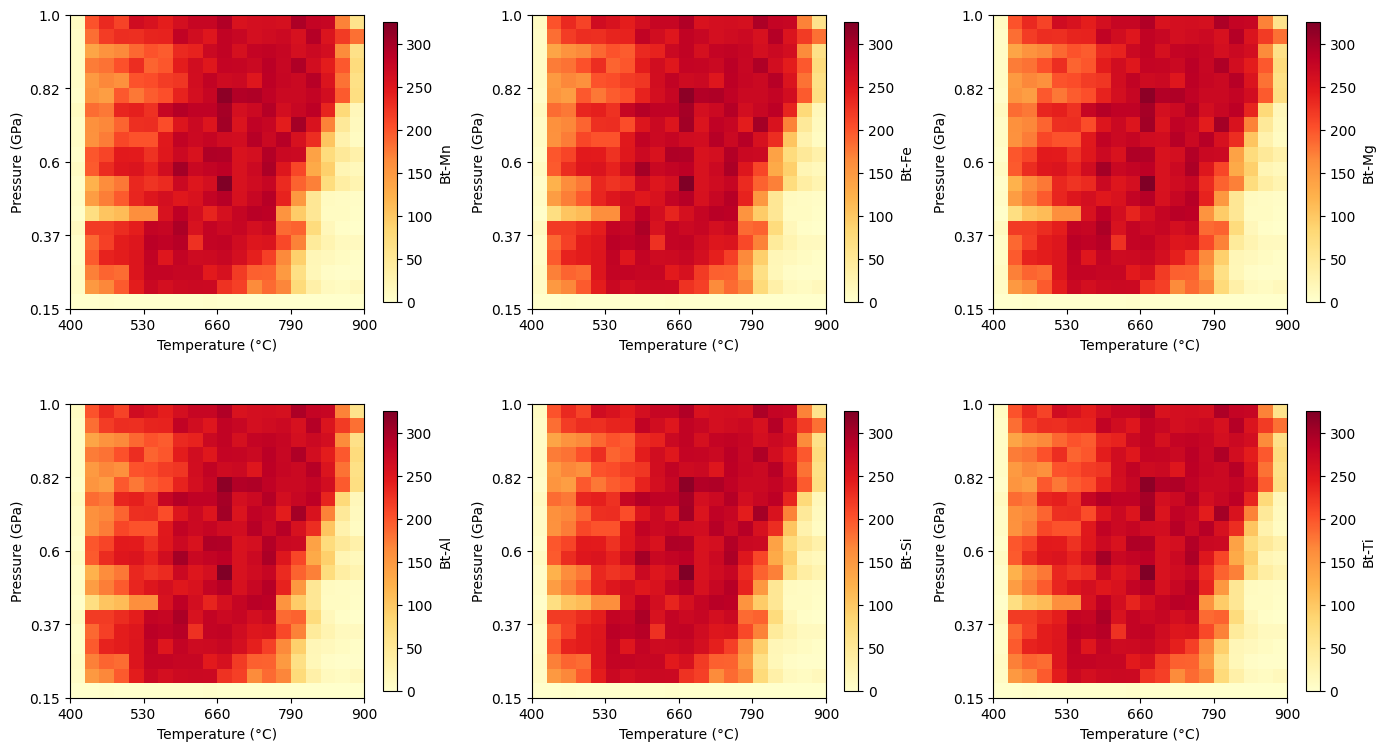

In [14]:
cmap_magma = plt.get_cmap("YlOrRd")
cmap_magma.set_bad("gainsboro")

NO_TICKS = 5

fig, axs = plt.subplots(2, 3, figsize=(14, 8))

for title, element_idx, ax in zip(["Mn", "Fe", "Mg", "Al", "Si", "Ti"], range(6), axs.flat):
    img = ax.imshow(grid_no_samples_ds55_Bt07, origin="lower", cmap=cmap_magma, extent=[0, 20, 0, 20])
    # ax.set_title(title)

    ax.set_xticks(np.arange(0, len(T_grid)+1, NO_TICKS))
    ax.set_xticklabels(np.int32(np.append(np.round(T_grid[0::NO_TICKS], decimals=-1), np.round(T_grid[-1], decimals=-1))))
    ax.set_xlabel("Temperature (°C)")
    ax.set_yticks(np.arange(0, len(P_grid)+1, NO_TICKS))
    ax.set_yticklabels(np.append(np.round(P_grid[0::NO_TICKS], decimals=2), np.round(P_grid[-1], decimals=2)))
    ax.set_ylabel("Pressure (GPa)")

    fig.colorbar(img, ax=ax, label=f"Bt-{title}", shrink=0.8)

fig.tight_layout()
# fig.savefig(Path("exported_figs", "SimBtComp_PT_noSamples_ds55Bt07.pdf"), dpi=600)

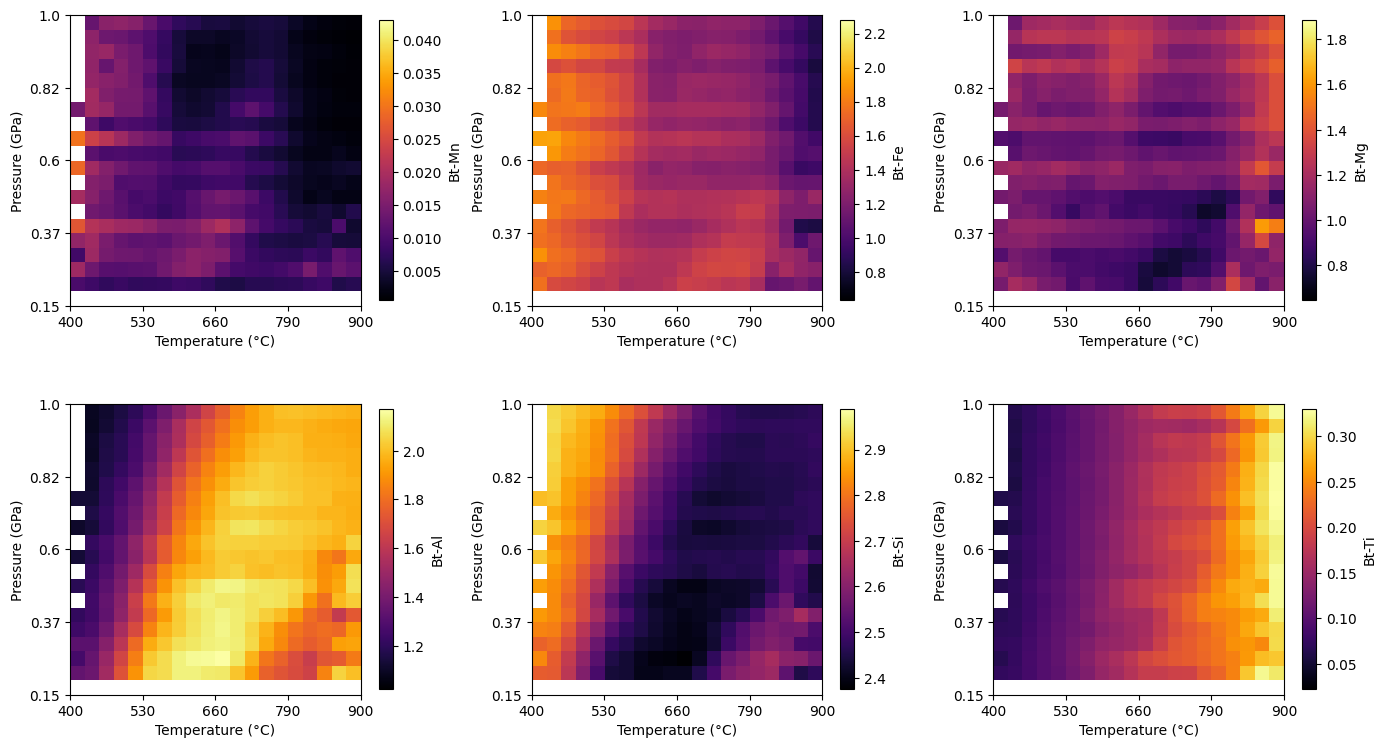

In [15]:
cmap_magma = plt.get_cmap("inferno")
cmap_magma.set_bad("white")

NO_TICKS = 5

fig, axs = plt.subplots(2, 3, figsize=(14, 8))

for title, element_idx, ax in zip(["Mn", "Fe", "Mg", "Al", "Si", "Ti"], range(6), axs.flat):
    img = ax.imshow(grid_mean_comp_ds55_BtT[:,:, element_idx], origin="lower", cmap=cmap_magma, extent=[0, 20, 0, 20], vmin=element_min[element_idx], vmax=element_max[element_idx])
    # ax.set_title(title)

    ax.set_xticks(np.arange(0, len(T_grid)+1, NO_TICKS))
    ax.set_xticklabels(np.int32(np.append(np.round(T_grid[0::NO_TICKS], decimals=-1), np.round(T_grid[-1], decimals=-1))))
    ax.set_xlabel("Temperature (°C)")
    ax.set_yticks(np.arange(0, len(P_grid)+1, NO_TICKS))
    ax.set_yticklabels(np.append(np.round(P_grid[0::NO_TICKS], decimals=2), np.round(P_grid[-1], decimals=2)))
    ax.set_ylabel("Pressure (GPa)")

    fig.colorbar(img, ax=ax, label=f"Bt-{title}", shrink=0.8)

fig.tight_layout()
# fig.savefig(Path("exported_figs", "SimBtComp_PT_ds55BtT.pdf"), dpi=600)

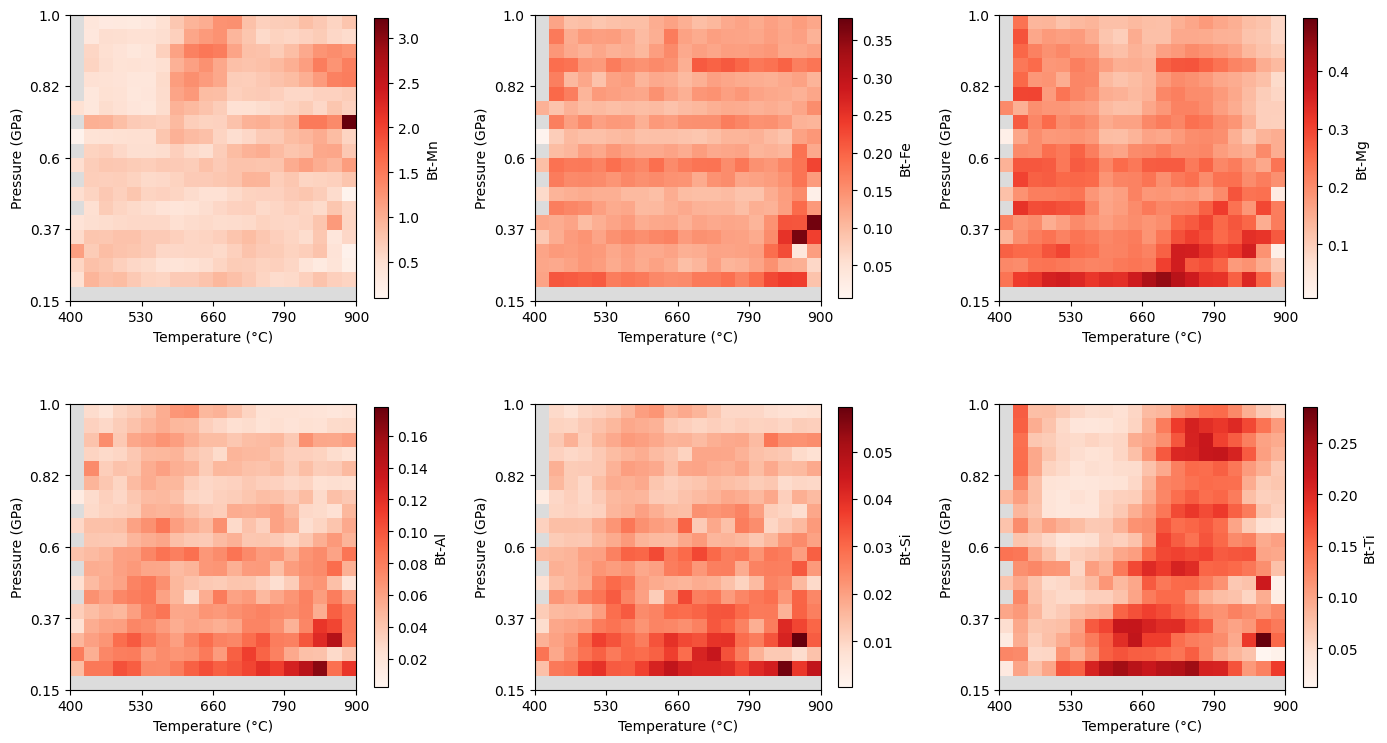

In [16]:
cmap_magma = plt.get_cmap("Reds")
cmap_magma.set_bad("gainsboro")

NO_TICKS = 5

fig, axs = plt.subplots(2, 3, figsize=(14, 8))

for title, element_idx, ax in zip(["Mn", "Fe", "Mg", "Al", "Si", "Ti"], range(6), axs.flat):
    img = ax.imshow(grid_rel_sd_comp_ds55_BtT[:,:, element_idx], origin="lower", cmap=cmap_magma, extent=[0, 20, 0, 20], vmin=rel_sd_min[element_idx], vmax=rel_sd_max[element_idx])
    # ax.set_title(title)

    ax.set_xticks(np.arange(0, len(T_grid)+1, NO_TICKS))
    ax.set_xticklabels(np.int32(np.append(np.round(T_grid[0::NO_TICKS], decimals=-1), np.round(T_grid[-1], decimals=-1))))
    ax.set_xlabel("Temperature (°C)")
    ax.set_yticks(np.arange(0, len(P_grid)+1, NO_TICKS))
    ax.set_yticklabels(np.append(np.round(P_grid[0::NO_TICKS], decimals=2), np.round(P_grid[-1], decimals=2)))
    ax.set_ylabel("Pressure (GPa)")

    fig.colorbar(img, ax=ax, label=f"Bt-{title}", shrink=0.8)

fig.tight_layout()
# fig.savefig(Path("exported_figs", "SimBtComp_PT_SD_ds55BtT.pdf"), dpi=600)

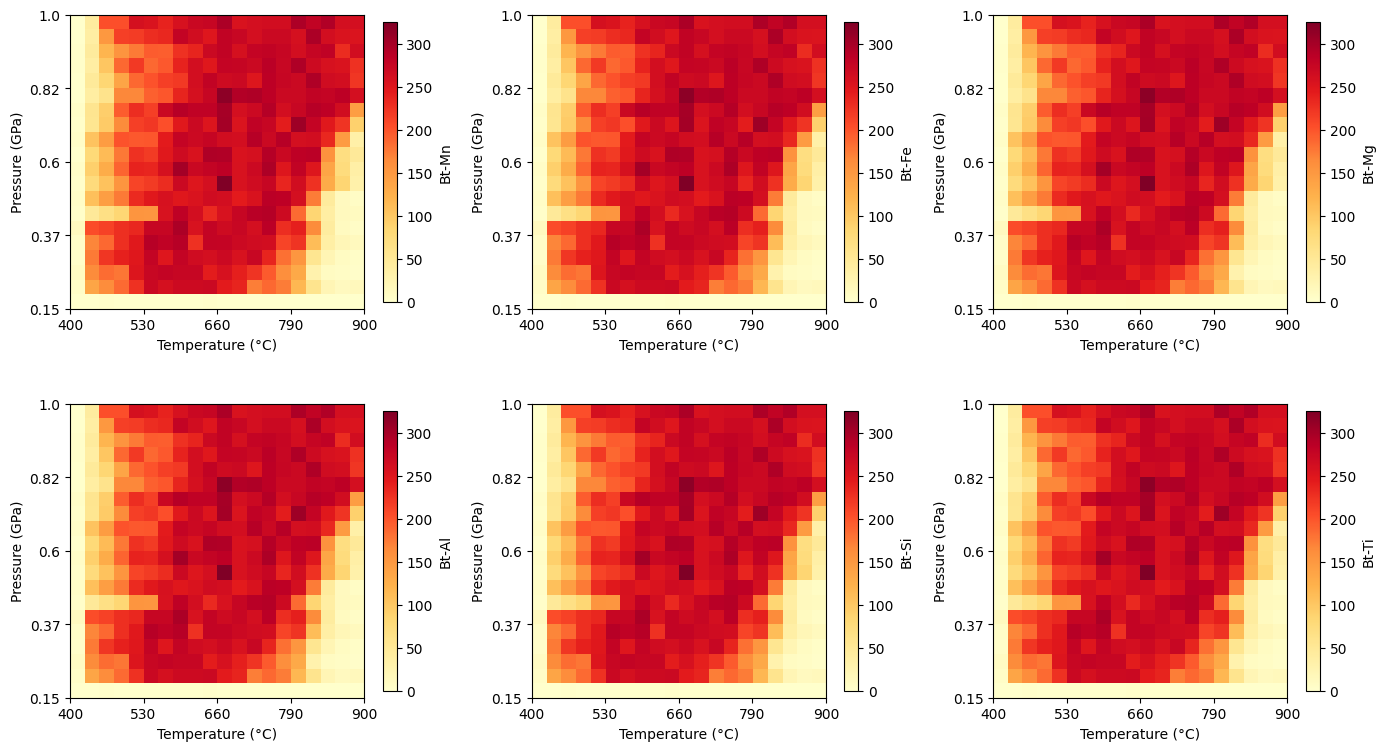

In [17]:
cmap_magma = plt.get_cmap("YlOrRd")
cmap_magma.set_bad("gainsboro")

NO_TICKS = 5

fig, axs = plt.subplots(2, 3, figsize=(14, 8))

for title, element_idx, ax in zip(["Mn", "Fe", "Mg", "Al", "Si", "Ti"], range(6), axs.flat):
    img = ax.imshow(grid_no_samples_ds55_BtT, origin="lower", cmap=cmap_magma, extent=[0, 20, 0, 20])
    # ax.set_title(title)

    ax.set_xticks(np.arange(0, len(T_grid)+1, NO_TICKS))
    ax.set_xticklabels(np.int32(np.append(np.round(T_grid[0::NO_TICKS], decimals=-1), np.round(T_grid[-1], decimals=-1))))
    ax.set_xlabel("Temperature (°C)")
    ax.set_yticks(np.arange(0, len(P_grid)+1, NO_TICKS))
    ax.set_yticklabels(np.append(np.round(P_grid[0::NO_TICKS], decimals=2), np.round(P_grid[-1], decimals=2)))
    ax.set_ylabel("Pressure (GPa)")

    fig.colorbar(img, ax=ax, label=f"Bt-{title}", shrink=0.8)

fig.tight_layout()
# fig.savefig(Path("exported_figs", "SimBtComp_PT_noSamples_ds55BtT.pdf"), dpi=600)